In [42]:
import pandas as pd
cpi = pd.read_csv("data/cpi.csv", header=0).dropna()
exchange_rate = pd.read_csv("data/exchange_rate.csv", header=0).dropna()
cpi_mean = cpi.groupby('half_year').mean()

In [43]:
print(cpi)

    half_year                  level_1    value
0     1993-H1   All Items - Lowest 20%   62.594
1     1993-H1   All Items - Middle 60%   67.942
2     1993-H1  All Items - Highest 20%   72.359
3     1993-H2   All Items - Lowest 20%   63.016
4     1993-H2   All Items - Middle 60%   68.445
..        ...                      ...      ...
157   2019-H1   All Items - Middle 60%  100.408
158   2019-H1  All Items - Highest 20%  100.679
159   2019-H2   All Items - Lowest 20%   98.350
160   2019-H2   All Items - Middle 60%  100.672
161   2019-H2  All Items - Highest 20%  100.927

[162 rows x 3 columns]


In [44]:
cpi_mean = cpi.groupby('half_year').mean()
cpi_mean

value
half_year            
1993-H1     67.631667
1993-H2     68.649667
1994-H1     70.069667
1994-H2     71.511667
1995-H1     71.732000
1995-H2     72.036667
1996-H1     72.520000
1996-H2     73.059000
1997-H1     73.891000
1997-H2     75.109667
1998-H1     74.012000
1998-H2     73.433333
1999-H1     73.721333
1999-H2     74.160333
2000-H1     74.593667
2000-H2     75.032000
2001-H1     75.271000
2001-H2     75.054333
2002-H1     74.857000
2002-H2     74.870000
2003-H1     75.044333
2003-H2     75.257000
2004-H1     75.878000
2004-H2     76.420667
2005-H1     76.084000
2005-H2     77.065667
2006-H1     77.141333
2006-H2     77.651000
2007-H1     77.520333
2007-H2     80.532333
2008-H1     83.007333
2008-H2     85.837000
2009-H1     85.019333
2009-H2     85.427000
2010-H1     86.622667
2010-H2     88.503667
2011-H1     90.720667
2011-H2     93.390000
2012-H1     95.602000
2012-H2     97.373333
2013-H1     98.366000
2013-H2     99.347667
2014-H1    100.033000
2014-H2     99.938667
2015-H1     99.539667
2015-H2     99.027667
2016-H1     98.524000
2016-H2     98.674000
2017-H1     99.005000
2017-H2     98.976667
2018-H1     99.165667
2018-H2     99.556333
2019-H1     99.742667
2019-H2     99.983000

In [45]:
exchange_rate.head(2)

date   value
0  02/01/91  1.7495
1  03/01/91  1.7370

In [46]:
import pandas as pd
cpi = pd.read_csv("data/cpi.csv", header=0).dropna()
exchange_rate = pd.read_csv("data/exchange_rate.csv", header=0).dropna()
cpi_mean = cpi.groupby('half_year').mean()

def discard_date(string):
    splits = string.split('/')
    year = splits[2]
    month = splits[1]
    half_year = 'H1'
    
    if(int(year) <= 20):
        year = '20' + str(year)
    else:
        year = '19' + str(year)
    
    if(int(month) > 6):
        half_year = 'H2'
    
    return year + '-' + half_year

exchange_rate['date'] = exchange_rate['date'].apply(discard_date)
exchange_rate = exchange_rate.groupby('date').mean()

exchange_rate.index.names = ["half_year"]
exchange_rate = exchange_rate.rename(columns={'value':'exchange_rate'})
cpi_mean = cpi_mean.rename(columns={'value':'CPI'})


print(exchange_rate, cpi_mean)

           exchange_rate
half_year               
1991-H1         1.754376
1991-H2         1.697900
1992-H1         1.640049
1992-H2         1.615250
1993-H1         1.630887
1993-H2         1.597829
1994-H1         1.567529
1994-H2         1.485443
1995-H1         1.418135
1995-H2         1.414817
1996-H1         1.410565
1996-H2         1.408057
1997-H1         1.427177
1997-H2         1.541633
1998-H1         1.656031
1998-H2         1.684598
1999-H1         1.707627
1999-H2         1.680994
2000-H1         1.709971
2000-H2         1.738769
2001-H1         1.782770
2001-H2         1.801181
2002-H1         1.817832
2002-H2         1.762500
2003-H1         1.746404
2003-H2         1.736794
2004-H1         1.698353
2004-H2         1.680791
2005-H1         1.646894
2005-H2         1.680825
2006-H1         1.607322
2006-H2         1.569253
2007-H1         1.528190
2007-H2         1.484900
2008-H1         1.386207
2008-H2         1.441219
2009-H1         1.491980
2009-H2         1.415859


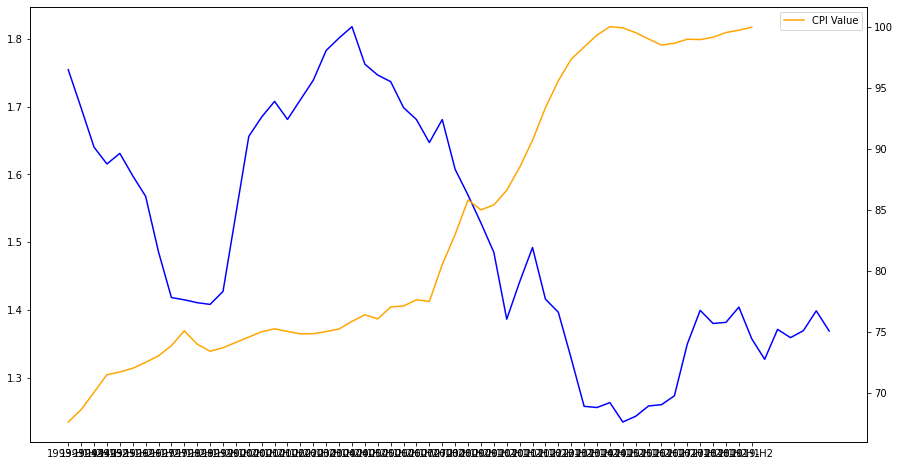

In [47]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
ax.plot(exchange_rate['exchange_rate'], color='blue', label='Exchange Rate')

ax2 = ax.twinx()
ax2.plot(cpi_mean['CPI'], color='orange', label='CPI Value')

plt.legend()
plt.show()

In [48]:
merged = pd.merge(exchange_rate, cpi_mean, on='half_year')
merged.corr()

exchange_rate       CPI
exchange_rate       1.000000 -0.756073
CPI                -0.756073  1.000000

In [49]:
merged

exchange_rate         CPI
half_year                           
1993-H1         1.630887   67.631667
1993-H2         1.597829   68.649667
1994-H1         1.567529   70.069667
1994-H2         1.485443   71.511667
1995-H1         1.418135   71.732000
1995-H2         1.414817   72.036667
1996-H1         1.410565   72.520000
1996-H2         1.408057   73.059000
1997-H1         1.427177   73.891000
1997-H2         1.541633   75.109667
1998-H1         1.656031   74.012000
1998-H2         1.684598   73.433333
1999-H1         1.707627   73.721333
1999-H2         1.680994   74.160333
2000-H1         1.709971   74.593667
2000-H2         1.738769   75.032000
2001-H1         1.782770   75.271000
2001-H2         1.801181   75.054333
2002-H1         1.817832   74.857000
2002-H2         1.762500   74.870000
2003-H1         1.746404   75.044333
2003-H2         1.736794   75.257000
2004-H1         1.698353   75.878000
2004-H2         1.680791   76.420667
2005-H1         1.646894   76.084000
2005-H2         1.680825   77.065667
2006-H1         1.607322   77.141333
2006-H2         1.569253   77.651000
2007-H1         1.528190   77.520333
2007-H2         1.484900   80.532333
2008-H1         1.386207   83.007333
2008-H2         1.441219   85.837000
2009-H1         1.491980   85.019333
2009-H2         1.415859   85.427000
2010-H1         1.396444   86.622667
2010-H2         1.328316   88.503667
2011-H1         1.257644   90.720667
2011-H2         1.255896   93.390000
2012-H1         1.263167   95.602000
2012-H2         1.234461   97.373333
2013-H1         1.243006   98.366000
2013-H2         1.258194   99.347667
2014-H1         1.260093  100.033000
2014-H2         1.273124   99.938667
2015-H1         1.349501   99.539667
2015-H2         1.399253   99.027667
2016-H1         1.379900   98.524000
2016-H2         1.381554   98.674000
2017-H1         1.404043   99.005000
2017-H2         1.357210   98.976667
2018-H1         1.327051   99.165667
2018-H2         1.371180   99.556333
2019-H1         1.359005   99.742667
2019-H2         1.369226   99.983000

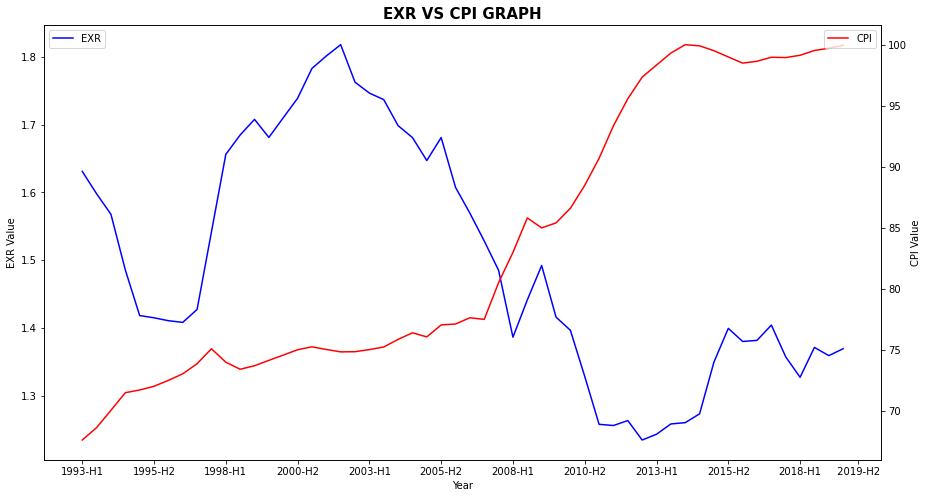

In [50]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
EXR_plot = ax.plot(merged['exchange_rate'], color='blue', label='EXR')
plt.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(cpi_mean['CPI'], color='red', label='CPI')   
plt.legend(loc='upper right')

ax.set(xlabel='Year', ylabel='EXR Value')
ax2.set(ylabel='CPI Value')
plt.title('EXR VS CPI GRAPH', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(merged.index[::5].tolist()+[' 2019-H2'])  #x-axis
plt.show()

#to download graph into png used
###plt.savefig('EXR Graph.png', dpi=100)

In [51]:
inflation = pd.read_excel("data/infl_interest.xlsx", header=0).dropna()
gdp=pd.read_csv("data/gdp.csv").dropna()

In [52]:
gdp

quarter                        level_1  value
0    1976-Q1  GDP In Chained (2015) Dollars    8.2
1    1976-Q2  GDP In Chained (2015) Dollars    7.4
2    1976-Q3  GDP In Chained (2015) Dollars    7.2
3    1976-Q4  GDP In Chained (2015) Dollars    7.0
4    1977-Q1  GDP In Chained (2015) Dollars    6.2
..       ...                            ...    ...
173  2019-Q2  GDP In Chained (2015) Dollars    0.2
174  2019-Q3  GDP In Chained (2015) Dollars    0.7
175  2019-Q4  GDP In Chained (2015) Dollars    1.0
176  2020-Q1  GDP In Chained (2015) Dollars   -0.3
177  2020-Q2  GDP In Chained (2015) Dollars  -13.2

[178 rows x 3 columns]

In [53]:
gdp_quarter = gdp.groupby('quarter').mean()
gdp_quarter

value
quarter       
1976-Q1    8.2
1976-Q2    7.4
1976-Q3    7.2
1976-Q4    7.0
1977-Q1    6.2
...        ...
2019-Q2    0.2
2019-Q3    0.7
2019-Q4    1.0
2020-Q1   -0.3
2020-Q2  -13.2

[178 rows x 1 columns]

In [54]:
gdp=pd.read_csv("data/gdp.csv").dropna()
gdp_quarter = gdp.groupby('quarter').mean()

def discard_date1(string):
    splits = string.split('-')
    year = splits[0]
    quartil = splits[1]
    half_year = 'H1'
    
    if(str(quartil) == 'Q3' or str(quartil) == 'Q4'):
        half_year = 'H2'
    
    return year + '-' + half_year

gdp['quarter'] = gdp['quarter'].apply(discard_date1)
gdp = gdp.groupby('quarter').mean()

gdp.index.names = ["half_year"]
gdp = gdp.rename(columns={'value':'GDP'})
gdp

GDP
half_year      
1976-H1    7.80
1976-H2    7.10
1977-H1    6.90
1977-H2    6.80
1978-H1    5.90
...         ...
2018-H1    4.85
2018-H2    2.05
2019-H1    0.60
2019-H2    0.85
2020-H1   -6.75

[89 rows x 1 columns]

In [55]:
exchange_rate

exchange_rate
half_year               
1991-H1         1.754376
1991-H2         1.697900
1992-H1         1.640049
1992-H2         1.615250
1993-H1         1.630887
1993-H2         1.597829
1994-H1         1.567529
1994-H2         1.485443
1995-H1         1.418135
1995-H2         1.414817
1996-H1         1.410565
1996-H2         1.408057
1997-H1         1.427177
1997-H2         1.541633
1998-H1         1.656031
1998-H2         1.684598
1999-H1         1.707627
1999-H2         1.680994
2000-H1         1.709971
2000-H2         1.738769
2001-H1         1.782770
2001-H2         1.801181
2002-H1         1.817832
2002-H2         1.762500
2003-H1         1.746404
2003-H2         1.736794
2004-H1         1.698353
2004-H2         1.680791
2005-H1         1.646894
2005-H2         1.680825
2006-H1         1.607322
2006-H2         1.569253
2007-H1         1.528190
2007-H2         1.484900
2008-H1         1.386207
2008-H2         1.441219
2009-H1         1.491980
2009-H2         1.415859
2010-H1         1.396444
2010-H2         1.328316
2011-H1         1.257644
2011-H2         1.255896
2012-H1         1.263167
2012-H2         1.234461
2013-H1         1.243006
2013-H2         1.258194
2014-H1         1.260093
2014-H2         1.273124
2015-H1         1.349501
2015-H2         1.399253
2016-H1         1.379900
2016-H2         1.381554
2017-H1         1.404043
2017-H2         1.357210
2018-H1         1.327051
2018-H2         1.371180
2019-H1         1.359005
2019-H2         1.369226
2020-H1         1.398591
2020-H2         1.368767

In [56]:
EXR_GDP = pd.merge(exchange_rate, gdp, on='half_year')
EXR_GDP.head()

exchange_rate    GDP
half_year                      
1991-H1         1.754376   6.45
1991-H2         1.697900   6.90
1992-H1         1.640049   5.55
1992-H2         1.615250   7.70
1993-H1         1.630887  10.65

In [57]:
EXR_GDP.corr()

exchange_rate       GDP
exchange_rate       1.000000  0.054232
GDP                 0.054232  1.000000

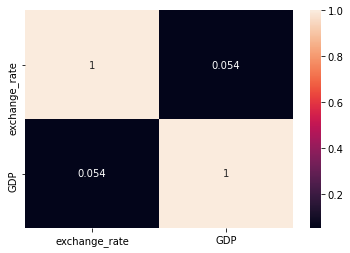

In [58]:
import seaborn as sns
sns.heatmap(EXR_GDP.corr(), annot=True)

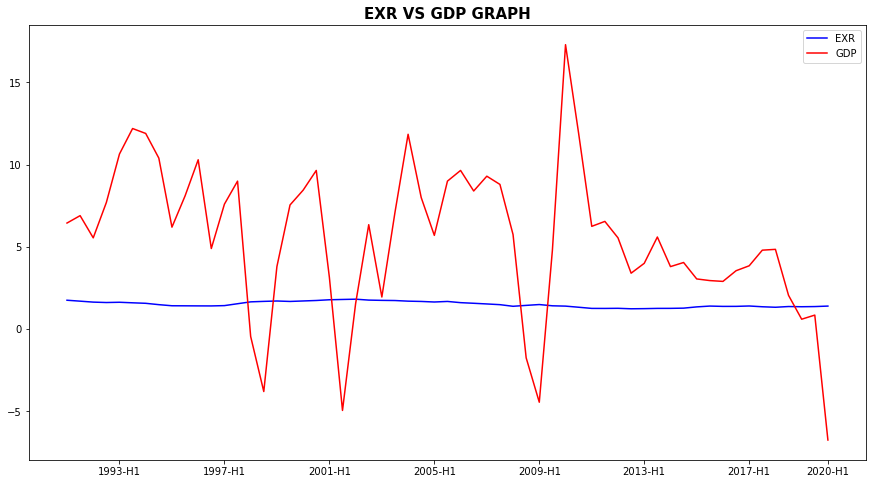

In [59]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))

plt.plot(EXR_GDP['exchange_rate'], color='blue', label='EXR')
plt.plot(EXR_GDP['GDP'], color='red', label='GDP')   
plt.legend(loc='upper right')

plt.title('EXR VS GDP GRAPH', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(merged.index[::8].tolist()+['2020-H1'])  #x-axis
plt.show()

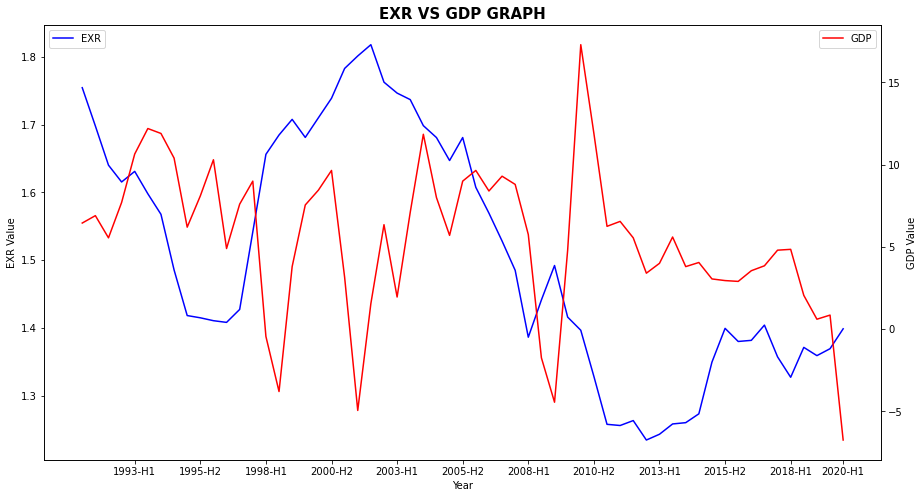

In [60]:
fig,ax = plt.subplots(figsize=(15,8))
EXR_plot = ax.plot(EXR_GDP['exchange_rate'], color='blue', label='EXR')
plt.legend(loc='upper left')

ax4 = ax.twinx()
ax4.plot(EXR_GDP['GDP'], color='red', label='GDP')   
plt.legend(loc='upper right')

ax.set(xlabel='Year', ylabel='EXR Value')
ax4.set(ylabel='GDP Value')
plt.title('EXR VS GDP GRAPH', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(merged.index[::5].tolist()+['2020-H1'])  #x-axis
plt.show()

# more

In [61]:
inflation_cp = pd.read_excel("data/infl_interest.xlsx", header=0).dropna()
inflation_cp

Country Name Country Code  \
0       Singapore          SGP   
1       Singapore          SGP   
2       Singapore          SGP   
3       Singapore          SGP   
4       Singapore          SGP   
5       Singapore          SGP   
6   United States          USA   
7   United States          USA   
8   United States          USA   
9   United States          USA   
10  United States          USA   
11  United States          USA   

                                        Series Name        Series Code  \
0             Inflation, consumer prices (annual %)     FP.CPI.TOTL.ZG   
1                             GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
2                         Lending interest rate (%)        FR.INR.LEND   
3                            Real interest rate (%)        FR.INR.RINR   
4   Real effective exchange rate index (2010 = 100)        PX.REX.REER   
5                 Consumer price index (2010 = 100)        FP.CPI.TOTL   
6             Inflation, consumer prices (annual %)     FP.CPI.TOTL.ZG   
7                             GDP growth (annual %)  NY.GDP.MKTP.KD.ZG   
8                         Lending interest rate (%)        FR.INR.LEND   
9                            Real interest rate (%)        FR.INR.RINR   
10  Real effective exchange rate index (2010 = 100)        PX.REX.REER   
11                Consumer price index (2010 = 100)        FP.CPI.TOTL   

   1971 [YR1971] 1972 [YR1972] 1973 [YR1973] 1974 [YR1974] 1975 [YR1975]  \
0        1.76101       2.08076       19.6367       22.3684       2.53653   
1        12.4138       13.3156       10.6026        6.1176       3.98169   
2             ..            ..            ..            ..            ..   
3             ..            ..            ..            ..            ..   
4             ..            ..            ..            ..            ..   
5        31.2616       31.9121       38.1786       46.7186       47.9036   
6        4.29277       3.27228       6.17776       11.0548       9.14315   
7        3.29336        5.2589       5.64572     -0.540547     -0.205464   
8        5.72333       5.24833       8.02167       10.7983        7.8625   
9       0.622615      0.887218       2.40973       1.65107      -1.28143   
10            ..            ..            ..            ..            ..   
11       18.5694       19.1771       20.3618       22.6127       24.6803   

   1976 [YR1976]  ... 2011 [YR2011] 2012 [YR2012] 2013 [YR2013]  \
0       -1.84189  ...      5.247793      4.575603      2.358604   
1        7.43718  ...      6.337871      4.461609      4.837299   
2             ..  ...      5.380000      5.380000      5.380000   
3             ..  ...      4.281050      4.886795      5.856076   
4             ..  ...    105.174921    110.044835    112.024316   
5        47.0213  ...    105.247793    110.063514    112.659477   
6        5.74481  ...      3.156842      2.069337      1.464833   
7        5.38814  ...      1.550836      2.249546      1.842081   
8           6.84  ...      3.250000      3.250000      3.250000   
9        1.26689  ...      1.137338      1.307083      1.469299   
10            ..  ...     95.011482     97.375250     97.537238   
11       26.0981  ...    103.156842    105.291505    106.833849   

    2014 [YR2014]  2015 [YR2015]  2016 [YR2016]  2017 [YR2017]  2018 [YR2018]  \
0        1.025148      -0.522618      -0.532269       0.576260       0.438620   
1        3.938003       2.988521       3.243474       4.336605       3.438111   
2        5.350000       5.350000       5.350000       5.280000       5.330000   
3        5.634826       2.221784       4.622536       2.432034       2.173523   
4      111.314061     108.323834     108.103366     106.812936     106.198685   
5      113.814403     113.219589     112.616956     113.265923     113.762730   
6        1.622223       0.118627       1.261583       2.130110       2.442583   
7        2.451973       2.880910       1.567215       2.217010       2.927323   
8        

In [62]:
inflation_cp = inflation_cp.drop(['Country Name','Series Code','Series Name','Country Code','2020 [YR2020]'], axis=1)
inflation_cp = inflation_cp.drop([1,2,3,4,5,7,8,9,10,11])

inflation_cp

1971 [YR1971] 1972 [YR1972] 1973 [YR1973] 1974 [YR1974] 1975 [YR1975]  \
0       1.76101       2.08076       19.6367       22.3684       2.53653   
6       4.29277       3.27228       6.17776       11.0548       9.14315   

  1976 [YR1976] 1977 [YR1977] 1978 [YR1978] 1979 [YR1979]  1980 [YR1980]  ...  \
0      -1.84189       3.16395       4.87254       4.07647       8.526943  ...   
6       5.74481       6.50168       7.63096       11.2545      13.549202  ...   

   2010 [YR2010]  2011 [YR2011]  2012 [YR2012]  2013 [YR2013]  2014 [YR2014]  \
0       2.823661       5.247793       4.575603       2.358604       1.025148   
6       1.640043       3.156842       2.069337       1.464833       1.622223   

   2015 [YR2015]  2016 [YR2016]  2017 [YR2017]  2018 [YR2018]  2019 [YR2019]  
0      -0.522618      -0.532269        0.57626       0.438620       0.565261  
6       0.118627       1.261583        2.13011       2.442583       1.812210  

[2 rows x 49 columns]

In [63]:
inflation_cp = inflation_cp.transpose()
inflation_cp.index.names = ['Year']
inflation_cp = inflation_cp.rename(columns={int(0):str('SGP Inflation')})
inflation_cp = inflation_cp.rename(columns={int(6):str('USA Inflation')})
inflation_cp.head()

SGP Inflation USA Inflation
Year                                     
1971 [YR1971]       1.76101       4.29277
1972 [YR1972]       2.08076       3.27228
1973 [YR1973]       19.6367       6.17776
1974 [YR1974]       22.3684       11.0548
1975 [YR1975]       2.53653       9.14315

In [64]:
def discard_year(string):
    splits = string.split(' ')
    year = splits[0]
    YR = splits[1]
    
    if(str(YR) == str([year])): print(year)
    return year

inflation_cp.index = inflation_cp.index.map(discard_year)
inflation_cp

SGP Inflation USA Inflation
Year                            
1971       1.76101       4.29277
1972       2.08076       3.27228
1973       19.6367       6.17776
1974       22.3684       11.0548
1975       2.53653       9.14315
1976      -1.84189       5.74481
1977       3.16395       6.50168
1978       4.87254       7.63096
1979       4.07647       11.2545
1980       8.52694       13.5492
1981       8.18202       10.3347
1982       3.91629       6.13143
1983       1.19641       3.21244
1984       2.60099       4.30054
1985      0.480123       3.54564
1986       -1.3857       1.89805
1987      0.523307       3.66456
1988       1.52319       4.07774
1989       2.34546         4.827
1990       3.46075       5.39796
1991        3.4257       4.23496
1992       2.26307       3.02882
1993        2.2893       2.95166
1994       3.10013       2.60744
1995       1.72053       2.80542
1996       1.38318        2.9312
1997       2.00359       2.33769
1998     -0.267502       1.55228
1999     0.0167098       2.18803
2000       1.36162       3.37686
2001      0.997198       2.82617
2002     -0.391677       1.58603
2003      0.507905       2.27009
2004       1.66273       2.67724
2005      0.425106       3.39275
2006      0.962902       3.22594
2007       2.10488       2.85267
2008       6.62778        3.8391
2009       0.59672     -0.355546
2010       2.82366       1.64004
2011       5.24779       3.15684
2012        4.5756       2.06934
2013        2.3586       1.46483
2014       1.02515       1.62222
2015     -0.522618      0.118627
2016     -0.532269       1.26158
2017       0.57626       2.13011
2018       0.43862       2.44258
2019      0.565261       1.81221

In [65]:
inflation_cp.tail()

SGP Inflation USA Inflation
Year                            
2015     -0.522618      0.118627
2016     -0.532269       1.26158
2017       0.57626       2.13011
2018       0.43862       2.44258
2019      0.565261       1.81221

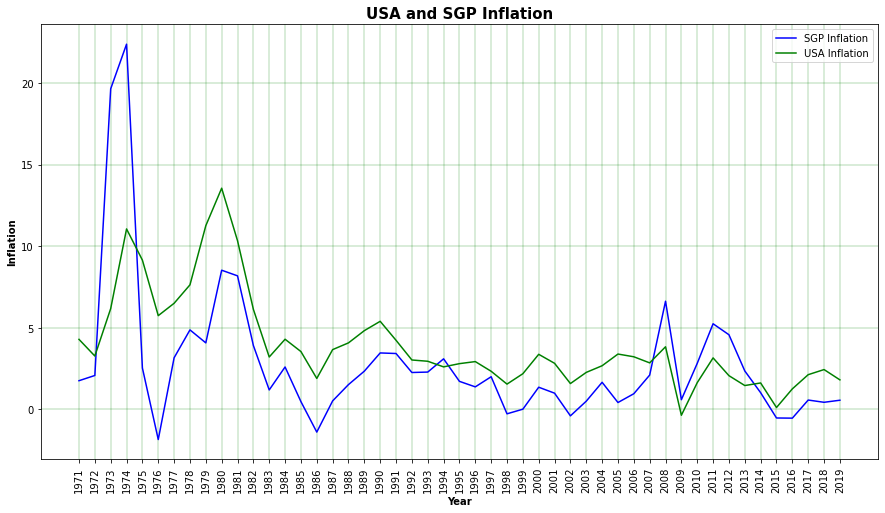

In [66]:
#The graph show the USA and SGP Inflation, Consumer Prices (annual %) from 1971 to 2019.
fig,ax = plt.subplots(figsize=(15,8))
plt.plot(inflation_cp['SGP Inflation'], color='blue', label='SGP Inflation')
plt.plot(inflation_cp['USA Inflation'], color='green', label='USA Inflation')   
plt.legend(loc='upper right')

plt.grid(color='g', linestyle='-', linewidth=0.3)

plt.xlabel('Year',fontdict={'fontweight':'bold'}) 
plt.ylabel('Inflation', fontdict={'fontweight':'bold'})
plt.title('USA and SGP Inflation', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(inflation_cp.index, rotation =90)
plt.show()

In [67]:
 exchange_rate.tail()

exchange_rate
half_year               
2018-H2         1.371180
2019-H1         1.359005
2019-H2         1.369226
2020-H1         1.398591
2020-H2         1.368767

In [68]:
def discard_date2(string):
    splits = string.split('-')
    year = splits[0]
    half_years = splits[1]
    
    return year
exchange_rate.index = exchange_rate.index.map(discard_date2)
exchange_rate = exchange_rate.groupby('half_year').mean()
exchange_rate.index.names = ["Year"]
exchange_rate

exchange_rate
Year               
1991       1.726138
1992       1.627650
1993       1.614358
1994       1.526486
1995       1.416476
1996       1.409311
1997       1.484405
1998       1.670315
1999       1.694311
2000       1.724370
2001       1.791975
2002       1.790166
2003       1.741599
2004       1.689572
2005       1.663859
2006       1.588287
2007       1.506545
2008       1.413713
2009       1.453920
2010       1.362380
2011       1.256770
2012       1.248814
2013       1.250600
2014       1.266608
2015       1.374377
2016       1.380727
2017       1.380627
2018       1.349115
2019       1.364115
2020       1.383679

In [69]:
EXR_Inflation = pd.merge(exchange_rate,inflation_cp , on='Year')
EXR_Inflation = EXR_Inflation.dropna()
EXR_Inflation.head()

exchange_rate SGP Inflation USA Inflation
Year                                           
1991       1.726138        3.4257       4.23496
1992       1.627650       2.26307       3.02882
1993       1.614358        2.2893       2.95166
1994       1.526486       3.10013       2.60744
1995       1.416476       1.72053       2.80542

In [70]:
EXR_Inflation.dtypes

exchange_rate    float64
SGP Inflation     object
USA Inflation     object
dtype: object

In [71]:
EXR_Inflation["SGP Inflation"] = pd.to_numeric(EXR_Inflation["SGP Inflation"], downcast="float")
EXR_Inflation["USA Inflation"] = pd.to_numeric(EXR_Inflation["USA Inflation"], downcast="float")
EXR_Inflation.head()

exchange_rate  SGP Inflation  USA Inflation
Year                                             
1991       1.726138       3.425702       4.234964
1992       1.627650       2.263071       3.028820
1993       1.614358       2.289300       2.951657
1994       1.526486       3.100133       2.607442
1995       1.416476       1.720534       2.805420

In [72]:
EXR_Inflation.corr()

exchange_rate  SGP Inflation  USA Inflation
exchange_rate       1.000000      -0.306792       0.329278
SGP Inflation      -0.306792       1.000000       0.510439
USA Inflation       0.329278       0.510439       1.000000

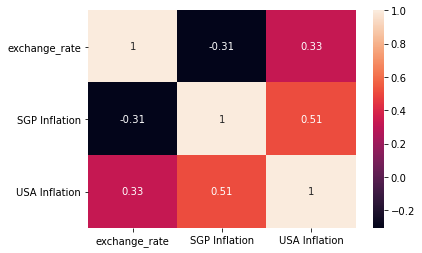

In [73]:
sns.heatmap(EXR_Inflation.corr(), annot=True)

In [74]:
###denote f(x) is distribution for exchange rate  
##g(x) is distribution for gdp  so g'(x) denote gdp growth corr(f(x), g(x)) is different from corr(f(x), g'(x))


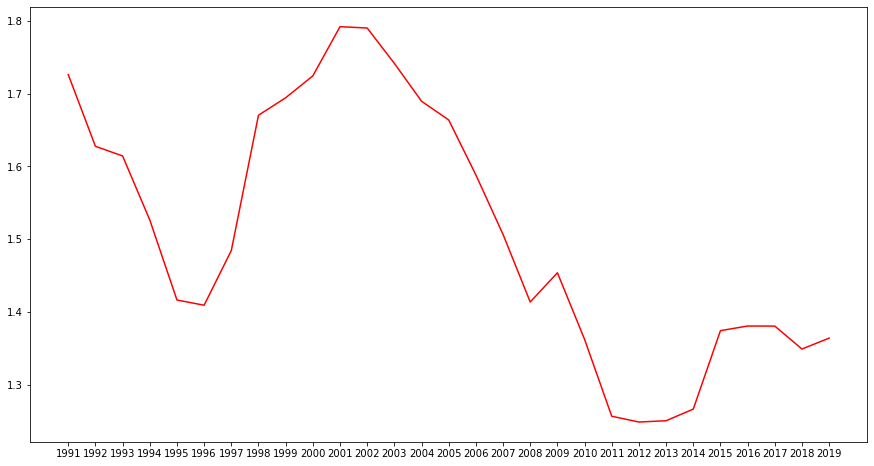

In [75]:
fig,ax = plt.subplots(figsize=(15,8))
EXR_plot = ax.plot(EXR_Inflation['exchange_rate'], color='red', label='EXR')
plt.show()

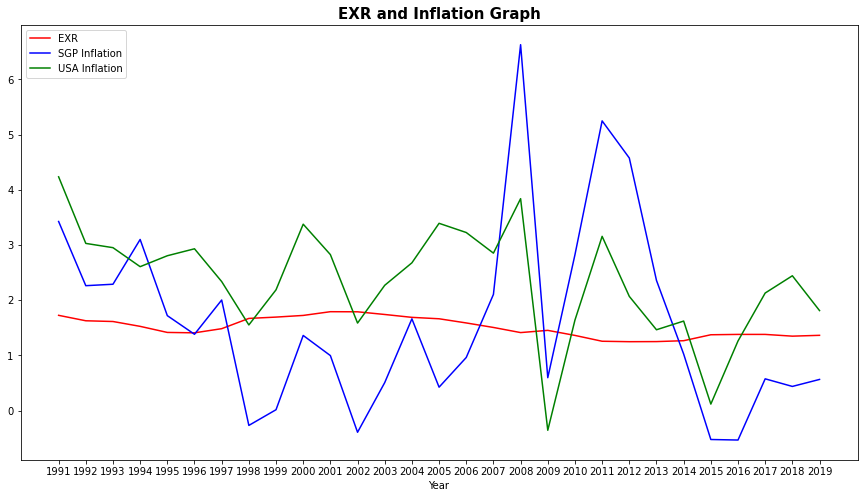

In [76]:
fig,ax = plt.subplots(figsize=(15,8))
EXR_plot = ax.plot(EXR_Inflation['exchange_rate'], color='red', label='EXR')

ax.plot(EXR_Inflation['SGP Inflation'], color='blue', label='SGP Inflation')   
ax.plot(EXR_Inflation['USA Inflation'], color='green', label='USA Inflation') 
plt.legend(loc='upper left')

ax.set(xlabel='Year')
plt.title('EXR and Inflation Graph', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(EXR_Inflation.index) #x-axis
plt.show()

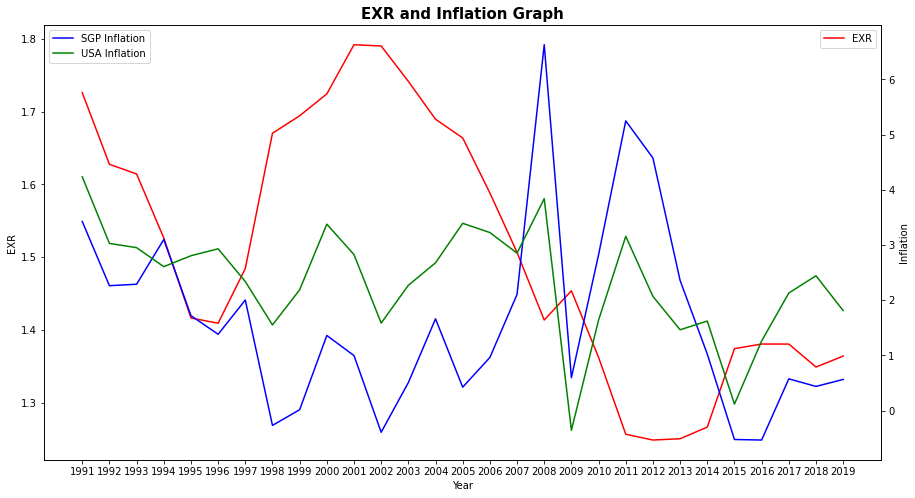

In [77]:
fig,ax = plt.subplots(figsize=(15,8))
EXR_plot = ax.plot(EXR_Inflation['exchange_rate'], color='red', label='EXR')
plt.legend(loc='upper right')

ax5 =ax.twinx()
ax5.plot(EXR_Inflation['SGP Inflation'], color='blue', label='SGP Inflation')   
ax5.plot(EXR_Inflation['USA Inflation'], color='green', label='USA Inflation') 
plt.legend(loc='upper left')

ax.set(xlabel='Year', ylabel='EXR')
ax5.set(ylabel ='Inflation')
plt.title('EXR and Inflation Graph', fontdict={'fontweight':'bold','fontsize':15})
 #x-axis
plt.show()

INFLATION USING CPI data set

In [78]:
merged.head()

exchange_rate        CPI
half_year                          
1993-H1         1.630887  67.631667
1993-H2         1.597829  68.649667
1994-H1         1.567529  70.069667
1994-H2         1.485443  71.511667
1995-H1         1.418135  71.732000

In [81]:
### From this dataset, we want to work out the inflation rate as well ###
import numpy as np
cpi_values = merged['CPI'].values

def inflation(cpi_1, cpi_2):
    return ((cpi_2 - cpi_1)/cpi_1) * 100

def get_inflation_from_cpi(cpi_vals):
    inflations = []
    for i in range(cpi_vals.shape[0]):
        if(i != cpi_vals.shape[0] - 1):
            inflations.append(inflation(cpi_vals[i], cpi_vals[i+1]))
    
    inflations.append(np.nan)
    return np.array(inflations)

merged['inflation'] = get_inflation_from_cpi(cpi_values)

In [84]:
merged.dropna()

exchange_rate         CPI  inflation
half_year                                      
1993-H1         1.630887   67.631667   1.505212
1993-H2         1.597829   68.649667   2.068473
1994-H1         1.567529   70.069667   2.057952
1994-H2         1.485443   71.511667   0.308108
1995-H1         1.418135   71.732000   0.424729
1995-H2         1.414817   72.036667   0.670955
1996-H1         1.410565   72.520000   0.743243
1996-H2         1.408057   73.059000   1.138806
1997-H1         1.427177   73.891000   1.649276
1997-H2         1.541633   75.109667  -1.461419
1998-H1         1.656031   74.012000  -0.781855
1998-H2         1.684598   73.433333   0.392192
1999-H1         1.707627   73.721333   0.595486
1999-H2         1.680994   74.160333   0.584320
2000-H1         1.709971   74.593667   0.587628
2000-H2         1.738769   75.032000   0.318531
2001-H1         1.782770   75.271000  -0.287849
2001-H2         1.801181   75.054333  -0.262921
2002-H1         1.817832   74.857000   0.017366
2002-H2         1.762500   74.870000   0.232848
2003-H1         1.746404   75.044333   0.283388
2003-H2         1.736794   75.257000   0.825172
2004-H1         1.698353   75.878000   0.715183
2004-H2         1.680791   76.420667  -0.440544
2005-H1         1.646894   76.084000   1.290241
2005-H2         1.680825   77.065667   0.098185
2006-H1         1.607322   77.141333   0.660692
2006-H2         1.569253   77.651000  -0.168274
2007-H1         1.528190   77.520333   3.885432
2007-H2         1.484900   80.532333   3.073300
2008-H1         1.386207   83.007333   3.408936
2008-H2         1.441219   85.837000  -0.952581
2009-H1         1.491980   85.019333   0.479499
2009-H2         1.415859   85.427000   1.399636
2010-H1         1.396444   86.622667   2.171487
2010-H2         1.328316   88.503667   2.504981
2011-H1         1.257644   90.720667   2.942365
2011-H2         1.255896   93.390000   2.368562
2012-H1         1.263167   95.602000   1.852820
2012-H2         1.234461   97.373333   1.019444
2013-H1         1.243006   98.366000   0.997974
2013-H2         1.258194   99.347667   0.689833
2014-H1         1.260093  100.033000  -0.094302
2014-H2         1.273124   99.938667  -0.399245
2015-H1         1.349501   99.539667  -0.514368
2015-H2         1.399253   99.027667  -0.508612
2016-H1         1.379900   98.524000   0.152247
2016-H2         1.381554   98.674000   0.335448
2017-H1         1.404043   99.005000  -0.028618
2017-H2         1.357210   98.976667   0.190954
2018-H1         1.327051   99.165667   0.393954
2018-H2         1.371180   99.556333   0.187164
2019-H1         1.359005   99.742667   0.240953

In [83]:
merged.corr()

exchange_rate       CPI  inflation
exchange_rate       1.000000 -0.756073  -0.236767
CPI                -0.756073  1.000000  -0.088160
inflation          -0.236767 -0.088160   1.000000

In [ ]:
#merged.to_csv('EXR_CPI_Inflation.csv') #to export data have been EDA/Analysis to csv 